In [1]:
!pip install tensorflow-text
import imblearn
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import tensorflow_hub as hub
import tensorflow_text as text
nltk.download("popular")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 36.2 MB/s 
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 439 kB 79.0 MB/s 
     |████████████████████████████████| 6.0 MB 49.9 MB/s 
     |████████████████████████████████| 1.7 MB 58.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [2]:
msg = pd.read_csv('train.csv')
df_test0=msg[msg["label"]==0]
df_test1=msg[msg["label"]==1]
df_test0=df_test0.iloc[0:250,]
df_test1=df_test1.iloc[0:250,]
msg=msg.drop(df_test0.index)
msg=msg.drop(df_test1.index)
test=pd.concat([df_test0,df_test1])
msg.reset_index(drop=True,inplace=True)

In [3]:
lemmatizer= WordNetLemmatizer()
corpus1=[]
for i in range(len(msg)):
    review=re.sub('[^a-zA-z]', ' ',msg['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus1.append(review)

In [4]:
test.reset_index(drop=True,inplace=True)

In [5]:
corpus2=[]
for i in range(len(test)):
    review=re.sub('[^a-zA-z]', ' ',test['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus2.append(review)

In [6]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
robertamodel = SentenceTransformer('sentence-transformers/all-roberta-large-v1')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.2 MB/s 
     |████████████████████████████████| 5.8 MB 71.5 MB/s 
     |████████████████████████████████| 1.3 MB 63.5 MB/s 
     |████████████████████████████████| 182 kB 78.7 MB/s 
     |████████████████████████████████| 7.6 MB 64.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=18e45fbbfbab41b93e1cdfbfc88cc19bba9c5bacaacfb7a2abdcb95955baea05
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/650 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [7]:
texttransform=robertamodel.encode(corpus1)
testtransform=robertamodel.encode(corpus2)

In [8]:
import imblearn
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority')
X, y = adasyn.fit_resample(texttransform, msg['label'])

In [9]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Bidirectional,Dropout
from keras.layers import CuDNNLSTM

In [10]:
X.shape

(59126, 1024)

Epoch 1/15
592/592 [==============================] - 4s 5ms/step - loss: 0.4337 - accuracy: 0.8220
Epoch 2/15
592/592 [==============================] - 3s 5ms/step - loss: 0.2660 - accuracy: 0.8981
Epoch 3/15
592/592 [==============================] - 4s 6ms/step - loss: 0.2377 - accuracy: 0.9100
Epoch 4/15
592/592 [==============================] - 3s 5ms/step - loss: 0.2187 - accuracy: 0.9182
Epoch 5/15
592/592 [==============================] - 3s 5ms/step - loss: 0.2027 - accuracy: 0.9242
Epoch 6/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1863 - accuracy: 0.9306
Epoch 7/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1700 - accuracy: 0.9376
Epoch 8/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1543 - accuracy: 0.9454
Epoch 9/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1404 - accuracy: 0.9522
Epoch 10/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1282 - accuracy: 0.9572

Text(0.5, 15.0, 'Predicted label')

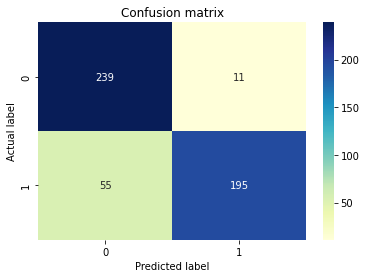

In [14]:
xt=X.reshape(59126,1,1024)
model=Sequential()
model.add(CuDNNLSTM(units = 6, kernel_initializer = 'uniform', input_shape = (1,1024)))
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(xt, y, batch_size = 100, epochs = 15)
y_pred = model.predict(testtransform.reshape(500,1,1024))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['label'], y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Epoch 1/15
592/592 [==============================] - 6s 6ms/step - loss: 0.4232 - accuracy: 0.8140
Epoch 2/15
592/592 [==============================] - 3s 6ms/step - loss: 0.2619 - accuracy: 0.9010
Epoch 3/15
592/592 [==============================] - 3s 5ms/step - loss: 0.2345 - accuracy: 0.9125
Epoch 4/15
592/592 [==============================] - 3s 5ms/step - loss: 0.2141 - accuracy: 0.9203
Epoch 5/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1961 - accuracy: 0.9266
Epoch 6/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1800 - accuracy: 0.9332
Epoch 7/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1652 - accuracy: 0.9400
Epoch 8/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1501 - accuracy: 0.9475
Epoch 9/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1364 - accuracy: 0.9535
Epoch 10/15
592/592 [==============================] - 3s 5ms/step - loss: 0.1224 - accuracy: 0.9605

Text(0.5, 15.0, 'Predicted label')

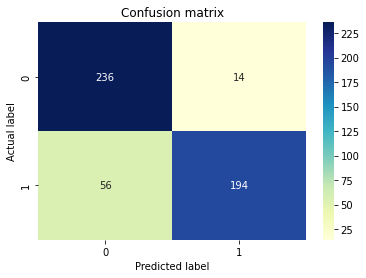

In [15]:
model=Sequential()
model.add(Bidirectional(CuDNNLSTM(units = 6, kernel_initializer = 'uniform', input_shape = (1,1024))))
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(xt, y, batch_size = 100, epochs = 15)
y_pred = model.predict(testtransform.reshape(500,1,1024))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['label'], y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')